# Calculating and Comparing Rates of Return

## Calculating a Security's RoR

To determine whether your return was good, we need a measure that ensures comparibility between investments with different market prices. To do this, we calculate a percentaige rate of return of the investment. Once we do that, we can compare it to other investments

> RoR = ((ending price + dividend) - beginning price) / beginning price
> = ((ending price + dividend) / beginning price) - 1

This is called a simple rate of return.

We can calculate the logarithmic return of the investment:
> log(ending price / beginning price)
> = log(ending price) - log(beginning price)

Simple and log returns provide slightly different results. So, it's important to be consitent with the way we calculate returns.

Most econometricians believe simple returns are preferable when you have to deal with multiple assets over the same time frame. Log returns are preferable when you have to make calculations about a single asset over time.

Always remember the time frame for when you calculated the rate of return. Investments with different holding periods shouldn't be compared. Typically, investors use daily, monthly, quarterly, or yearly returns. Most popular expression is annually.
> annual return = ((daily return + 1)^365) * 100 - 1

We can't predict the future rate of return, but we *can* form a reasonable proxy and acll that proxy 'expected rate of return'. The best idea we can have about a financial security's expected rate of return is its past behavior. Historical performance can help us build expectations about the future. 

## Rate of Return with Python

In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')
PG.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.313478
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.246841
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.130219
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.146880
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.113561


Here, we've imported Proctor and Gamble data from Yahoo Finance for the period from 1995-1-1.

When calculating the rate of return, we use the adjusted closing price, these adjustments reflect divident payments to shareholders and operations such as stock splits.

### Simple Returns

So we do our rate of return calc starting from 1995-1-3 on 1994-1-4 and keep going down. Best way to organize data is to do it in a column. Here's how we create one:

In [5]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
PG['simple_return']

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2020-07-02    0.007501
2020-07-06    0.006205
2020-07-07    0.004851
2020-07-08    0.005482
2020-07-09   -0.003336
Name: simple_return, Length: 6425, dtype: float64


This^ exhibits the percentage daily change of the adjusted closing price.

Let's plot them on a graph:

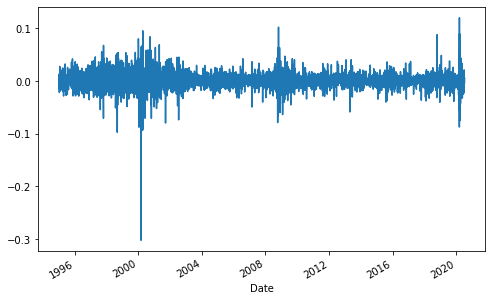

In [6]:
PG['simple_return'].plot(figsize=(8, 5))
plt.show()

In finance, we're accustomed to seeing negative returns that have a much higher magnitude of positiev returns. 

Usually, positive returns accumulate over time and stock prices increase. But when things go wrong, prices fall hella fast. Long run investors are mainly interested in average rate of return.

In [7]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d
# avg RoR for entire data set

0.0005223873892836839

In [9]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a
# acg RoR per year (250 because we only include trading days)

0.13059684732092097

In [10]:
print(str(round(avg_returns_a, 5) * 100) + '%')

13.059999999999999%


### Log Returns
numpy will provide us with tools for this computation. It offers possiblity of vectorized computation. This gives us the ability to organize several kinds of data processing tasks as array expressions (vectors, matrices, etc)

In [11]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.313478,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.246841,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,8.130219,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.146880,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,8.113561,-0.004090


In [12]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
PG['log_return']

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2020-07-02    0.007473
2020-07-06    0.006185
2020-07-07    0.004839
2020-07-08    0.005467
2020-07-09   -0.003342
Name: log_return, Length: 6425, dtype: float64

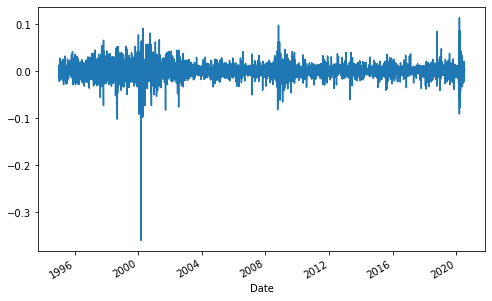

In [13]:
PG['log_return'].plot(figsize=(8, 5))
plt.show()

In [14]:
log_return_d = PG['log_return'].mean()
log_return_d

0.00041875306180640457

In [15]:
log_return_a = PG['log_return'].mean() * 250
log_return_a

0.10468826545160115

In [17]:
print(str(round(log_return_a, 5) * 100) + '%')

10.469000000000001%


## What is a Portfolio of Securities and how to calculate its Rate of Return

Most investors own several stocks - investment portfolio. Every investor tries to select and add stocks that will optimize the overall rate of return of their portfolio. We want to calculate the historical rate of return of a portfolio because it will show us the rate of return that can be expect from this portfolio in the future. How should one do this?
>sum((avg_return_for_security * weight_in_portfolio) per security)

### Calculating the Return of a Portfolio of Securities

In [18]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [19]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']
    
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6426 entries, 1995-01-03 to 2020-07-10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6426 non-null   float64
 1   MSFT    6426 non-null   float64
 2   F       6426 non-null   float64
 3   GE      6426 non-null   float64
dtypes: float64(4)
memory usage: 251.0 KB


In [20]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.313478,2.406834,3.262354,2.725145
1995-01-04,8.246841,2.424330,3.350130,2.725145
1995-01-05,8.130219,2.384342,3.320871,2.731823
1995-01-06,8.146880,2.424330,3.320871,2.718464
1995-01-09,8.113561,2.409335,3.379390,2.691748


In [21]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-07-06,121.629997,210.699997,6.190,7.0000
2020-07-07,122.220001,208.250000,6.120,6.7600
2020-07-08,122.889999,212.830002,6.090,6.8600
2020-07-09,122.480003,214.320007,5.840,6.5800
2020-07-10,123.185501,212.604996,5.899,6.6974


#### Normalization to 100:
> (Pt / P0) * 100 = (adj_price_at_date_t / first_adj_price) * 100

In [22]:
mydata.iloc[0]
# this extracts the data from the first column of the table

PG      8.313478
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

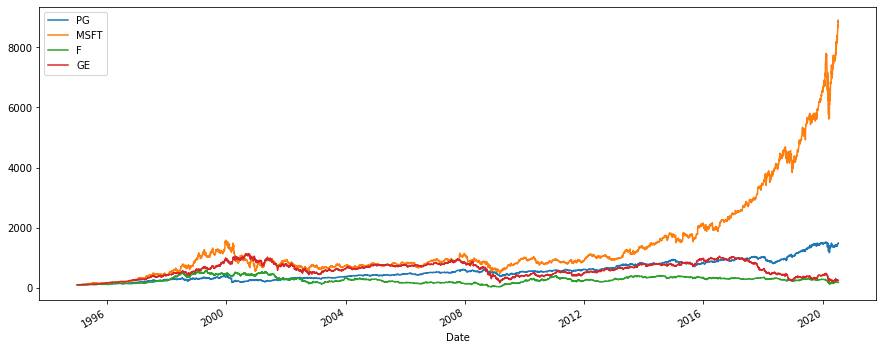

In [23]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

This is a mathematical trick - the first row divided by itself will always produce one, multiplied by 100 will give 100.

That's why in the graph, all the lines initiate from the vertical axis at 100. The idea behind this operation is to compare the behavior of the four different stocks as if they were all starting from the same value (100).

Normalization tackles this issue and is a practice every financer applies in their work. 

Btw:

In [24]:
mydata.loc['1995-01-03']
# When using loc, we supply the label

PG      8.313478
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [25]:
mydata.iloc[0]
# When using iloc, we supply the index

PG      8.313478
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

To interpret the graph, we can see that Microsoft is a fair winner. It beats the other stocks regarding stock price performance. 

The moment of the financial crisis, General Electric performed better than P&G. But apparently, it couldn't sustain the tumble - P&G shares have cost more ever since. 

Ford enjoyed a short time lead over P&G at the beginning, but that was all. Their Adj Close price has since remained relatively low.

In theory, if past performance is indicative of expected future performance, this type of analysis could help you understand which stocks performed better historically. 

The next task is to calculate the simple return of these stocks and create a new table with them:

In [26]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


Why simple returns? Because it's the preferred approach when we investigate a few stocks over the same time period. 

In [29]:
# This is a perfect situation where we can apply creating a numpy array
weights = np.array([0.25, 0.25, 0.25, 0.25])
# here, we're assuming equal weights of 25% for all four stocks

So, what we still need to do is calc the product of the weight of each stock by its return. This will be equivalent to a matric multiplication in math. Let's use numpy's dot method. 

This allows us to calculate vector or matrix products. In pythonic, the one or multi-dimensional array we onbtain is referred to as the dot product between the variables.

In [30]:
np.dot(returns, weights)

array([        nan,  0.00653988, -0.00922976, ...,  0.00934142,
       -0.01955066,  0.00642568])

Hold on, this isn't right. We expected a number but got an array because we multiplied each value from the returns table with the weights quoted. We forgot to estimate the average return of each stock's price first.

In [31]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.130801
MSFT    0.224427
F       0.103065
GE      0.085704
dtype: float64

In [32]:
np.dot(annual_returns, weights)

0.13599914878468555

In [34]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + "%"
print(pfolio_1)

13.600000000000001%


To compare this combination with the performance of another portfolio, we must assign new weights for each stock. We already know the mechanics and have calculated the annual returns. So, we need to go through the same steps to obtain the return of the second portfolio.

In [35]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'

print(pfolio_1)
print(pfolio_2)

13.600000000000001%
16.184%


## Popular stock indices that can help us understand financial markets 

A market index provides an idea about how a given stock market is performing. It represents a large enough sample of the overall number of stocks in that market and can be considered a good enough proxy of the overall development of the market. 

The three most famous in the US:
1. S&P500
    - 500 largest listed companies
    - Diverse constituency -> true approximation of the US stock market
    - Market cap weighted, companies are weighted according to their market value
2. Dow Jones
    - 30 large public stocks
    - One of the oldest indices
    - NOT a true representation of the US stock market
3. NASDAQ
    - Grouped securities
    - Most are IT companies
    - Shows us the RoR of tech stocks
    
Why is this important? If you want to undersatnd whether one of the stocks you own is performing well, one of the best comparators is a stock index. Compare the stock against the overall market performance. In addition, a stock index gives you a sense of the type of return you can expect if you invest in a well diversified portfolio in a given market.

## Calculating the Return of Indices

In [39]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [40]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
2000-01-03,1455.219971,4131.149902,6750.759766
2000-01-04,1399.420044,3901.689941,6586.950195
2000-01-05,1402.109985,3877.540039,6502.069824
2000-01-06,1403.449951,3727.129883,6474.919922
2000-01-07,1441.469971,3882.620117,6780.959961


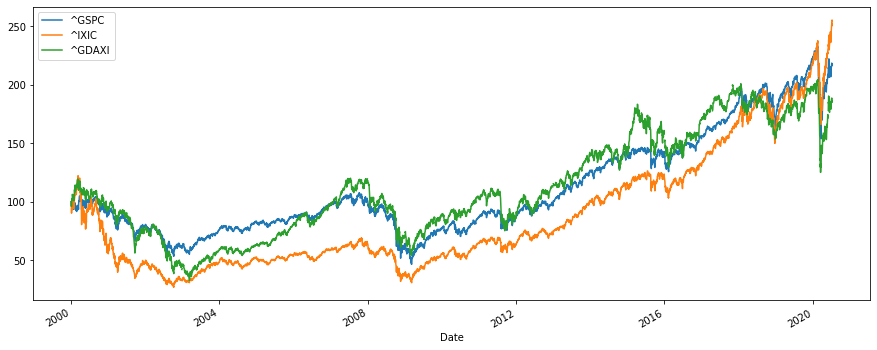

In [42]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

In [46]:
# Indices simple returns
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2020-07-06,0.015882,0.022142,0.009913
2020-07-07,-0.010819,-0.008603,-0.009161
2020-07-08,0.007827,0.014367,-0.009669
2020-07-09,-0.005644,0.005266,-0.000428
2020-07-10,0.000679,-0.001599,0.006152


In [47]:
# annual returns
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.057267
^IXIC     0.077512
^GDAXI    0.043845
dtype: float64

Implication here is that the average of the companies listed under the four indices has provided investors with a positive rate of return over the past 2 decades. Here, we can see that NASDAQ is outperforming the others by a bit. 

In [52]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [53]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2020-07-06,121.629997,3179.719971,26287.029297
2020-07-07,122.220001,3145.320068,25890.179688
2020-07-08,122.889999,3169.939941,26067.279297
2020-07-09,122.480003,3152.050049,25706.089844
2020-07-10,123.180000,3157.300049,25824.679688


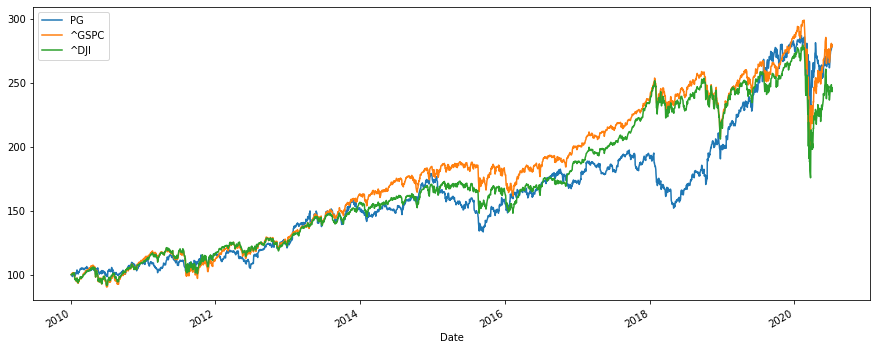

In [54]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

This is how we can compare the performance of stocks and stock indices.